In [59]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns


In [3]:
data = pd.read_csv('diabetes.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               763 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             763 non-null    float64
 3   SkinThickness             765 non-null    float64
 4   Insulin                   764 non-null    float64
 5   BMI                       763 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       762 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

Pregnancies                 5
Glucose                     0
BloodPressure               5
SkinThickness               3
Insulin                     4
BMI                         5
DiabetesPedigreeFunction    0
Age                         6
Outcome                     0
dtype: int64

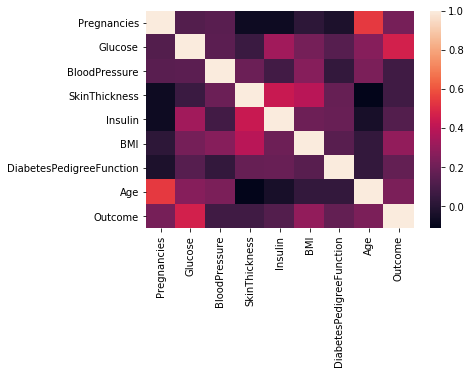

In [60]:
corr = data.corr(method = 'pearson')
sns.heatmap(corr,)

In [61]:
X = dataset.iloc[:, 0:8].values
y = dataset.iloc[:, -1].values


In [62]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,     nan,   0.315,  23.   ]])

In [63]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [22]:
#computing euclidean distance
def ECD(x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

In [27]:
class KNN:

    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
       
        #computing the euclidean distance of all value of x
        distances = [ECD(x, x_train) for x_train in self.X_train]
        
        # sorting the destance and selecting the k neighbors
        k_idx = np.argsort(distances)[:self.k]
        
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]  
        
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

In [52]:
#findeg the best value of k
#score_list =[]
# for i in range(15):
#     classifier=KNN(i)
#     classifier.fit(X_train,y_train)
#     y_pred=classifier.predict(X_test) 
#     print(accuracy_score(y_test, y_pred))
# print(score_list)
# print(max(score_list))


0.7727272727272727


In [55]:
#for k = 10 we getting good score
classifier=KNN(10)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test) 


cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

[[83 16]
 [19 36]]
0.7727272727272727


In [56]:
TN=cm[0][0]
FN=cm[1][0]
TP=cm[1][1]
FP=cm[0][1]
accuracy=(TN+TP)/(TN+TP+FN+FP)
precision=(TP)/(TP+FP)
recall=TP/(TP+FN)

print('Accuracy: ',accuracy,'\nPrecision:',precision,'\nRecall:',recall)



Accuracy:  0.7727272727272727 
Precision: 0.6923076923076923 
Recall: 0.6545454545454545
